In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
# 2.Load Dataset
data = pd.read_csv("halong_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,6,6,45,3,500,NaN
1,3/2/2019,59,55,1,6,500,NaN
2,3/3/2019,43,28,5,9,500,NaN
3,3/4/2019,27,3,4,16,500,NaN
4,3/5/2019,48,17,16,1,500,NaN
...,...,...,...,...,...,...,...
1915,5/28/2024,64,32,48,9,500,NaN
1916,5/29/2024,47,20,23,8,500,NaN
1917,5/30/2024,40,6,49,9,500,NaN
1918,5/31/2024,12,18,14,8,500,NaN


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1920 non-null   object 
 1   pm25    1920 non-null   int64  
 2   pm10    1920 non-null   int64  
 3   o3      1920 non-null   int64  
 4   no2     1920 non-null   int64  
 5   so2     1920 non-null   int64  
 6   co      0 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.0,0.0
mean,40.085938,23.563021,18.845833,9.697396,500.0,NaN
std,22.956887,13.469754,20.556540,7.802379,0.0,NaN
min,5.000000,3.000000,1.000000,1.000000,500.0,NaN
25%,22.000000,13.000000,8.000000,1.000000,500.0,NaN
50%,38.000000,22.000000,13.000000,9.000000,500.0,NaN
75%,54.000000,32.000000,22.000000,15.000000,500.0,NaN
max,163.000000,86.000000,268.000000,36.000000,500.0,NaN


In [4]:
#Chọn thuộc tính
data = data[['pm25','pm10']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25,pm10
0,6,6
1,59,55
2,43,28
3,27,3
4,48,17
...,...,...
1915,64,32
1916,47,20
1917,40,6
1918,12,18


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)

<Axes: >

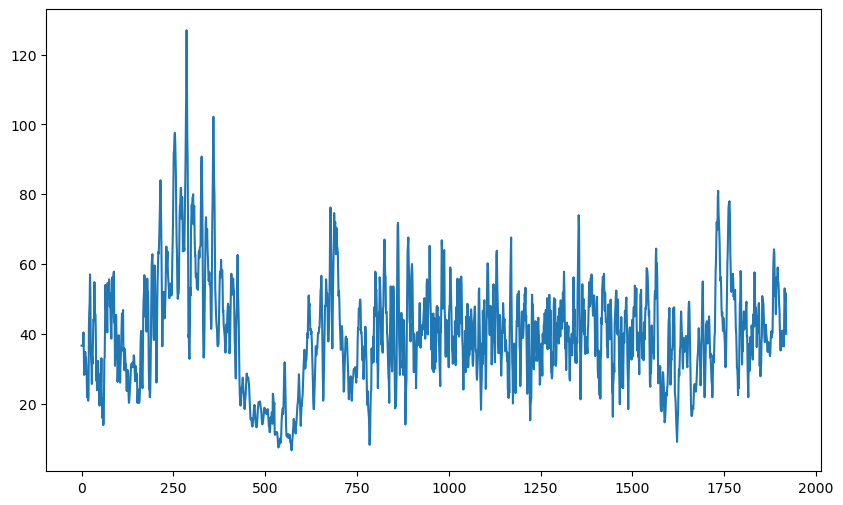

In [6]:
data['pm25'].plot(figsize=(10,6))

In [7]:
# Split the data into training, testing
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1536
Test data size: 384


In [8]:
# 3. Quá trình Training
model = VAR(train_data)
model_fitted = model.fit(maxlags =15 , ic='aic')

In [9]:
# 4. Quá trình testing 
# Dự đoán cho cả 'pm25' và 'pm10'
y_pred = model_fitted.forecast(train_data.values[-model_fitted.k_ar:], steps=len(test_data))


In [10]:
y_pred

array([[45.82661922, 25.86522053],
       [43.4887286 , 22.66567288],
       [37.34348253, 23.84268957],
       [39.33240237, 20.69871151],
       [37.01258451, 22.80274302],
       [35.7339338 , 22.96286521],
       [36.37381198, 23.43975472],
       [38.25380836, 21.90274151],
       [38.45252207, 23.32545424],
       [38.14566522, 23.21460952],
       [39.18474993, 23.49720855],
       [40.03499021, 23.57959952],
       [40.49913977, 24.25716846],
       [40.01082812, 24.47475773],
       [41.09959662, 24.06705485],
       [40.96676988, 23.87746828],
       [39.92608949, 23.91431094],
       [39.39137881, 24.04460108],
       [39.67791275, 23.30332478],
       [39.02178749, 23.54704278],
       [38.6416998 , 23.62635115],
       [39.21543288, 23.56647322],
       [39.32619055, 23.19822047],
       [39.22274355, 23.69911911],
       [39.31420852, 23.70403804],
       [39.6987661 , 23.70413927],
       [39.65444581, 23.73645479],
       [39.71600563, 24.0158766 ],
       [39.79552435,

In [11]:
y_pred = pd.DataFrame(y_pred, columns=['pm25', 'pm10'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [12]:
y_pred

array([[40.60076345, 23.1750075 ],
       [40.60076345, 23.1750075 ],
       [40.60076345, 23.1750075 ],
       [40.60076345, 23.1750075 ],
       [40.60076345, 23.1750075 ],
       [38.58222636, 22.59453644],
       [37.15924304, 22.74935281],
       [37.34130821, 22.36136319],
       [37.16533215, 22.88671174],
       [37.39194829, 22.96908504],
       [38.08211151, 23.07595371],
       [38.81434716, 23.10392267],
       [39.26341344, 23.57480806],
       [39.57507465, 23.80466876],
       [40.16586093, 23.97515782],
       [40.52226492, 24.05120977],
       [40.50048477, 24.11815205],
       [40.27893258, 24.07563858],
       [40.21234951, 23.84135199],
       [39.79678768, 23.73734957],
       [39.33177367, 23.68712615],
       [39.18964235, 23.6175586 ],
       [39.17660469, 23.44828248],
       [39.08557085, 23.52744135],
       [39.14405506, 23.5588404 ],
       [39.35546832, 23.57439802],
       [39.44327091, 23.60839434],
       [39.52123392, 23.77192556],
       [39.63579008,

In [13]:

# 5. Quá trình tạo index predict 90 ngày tiếp theo
last_index = data.index[-1]

# # Dự đoán cho 90 ngày tiếp theo
y_next_90_days = model_fitted.forecast(data.values[-model_fitted.k_ar:], steps=90)



# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)



Predicted closing prices for the next 90 days:
[[36.5295376  19.33479522]
 [35.82999435 19.21836057]
 [32.57626069 21.67814147]
 [34.43352373 21.19033694]
 [37.53804516 22.65061746]
 [37.69758614 22.99729989]
 [39.49764487 23.77711981]
 [41.08094343 24.60707134]
 [39.67631924 24.35105242]
 [41.79338108 25.02538347]
 [42.27092254 25.48966124]
 [41.54085564 25.61322387]
 [41.75689129 24.48405936]
 [42.17977011 25.15923476]
 [39.63106688 24.51122711]
 [39.72557775 23.96398999]
 [39.45309688 23.51663414]
 [38.54594554 23.88883856]
 [38.83325048 23.37749325]
 [39.70101749 23.53147103]
 [39.35774705 23.75000474]
 [39.81567987 23.90911564]
 [40.43859507 24.07195218]
 [40.02301    24.19846591]
 [40.45185983 24.2603057 ]
 [40.60691173 24.31273466]
 [40.47717896 24.43175839]
 [40.44566758 24.17592867]
 [40.68796479 24.28892285]
 [40.10415438 24.24533285]
 [40.23280208 24.1128066 ]
 [40.13477584 23.97142128]
 [39.894863   24.10144013]
 [39.89958285 23.96216738]
 [40.11577717 23.95161013]
 [39.936

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính RMSE
rmse = np.sqrt(mean_squared_error(test_data['pm25'], y_pred[:, 0]))
print('Testing RMSE:', rmse)

# Tính MAE
mae = mean_absolute_error(test_data['pm25'], y_pred[:, 0])
print('\nTesting MAE:', mae)

# Tính MAPE
mape = np.mean(np.abs((test_data['pm25'] - y_pred[:, 0]) / test_data['pm25'])) * 100
print('\nTesting MAPE:', mape)


Testing RMSE: 13.101496231662358

Testing MAE: 10.160953476720765

Testing MAPE: 31.219516185703437


In [15]:
test_data.index

RangeIndex(start=1536, stop=1920, step=1)

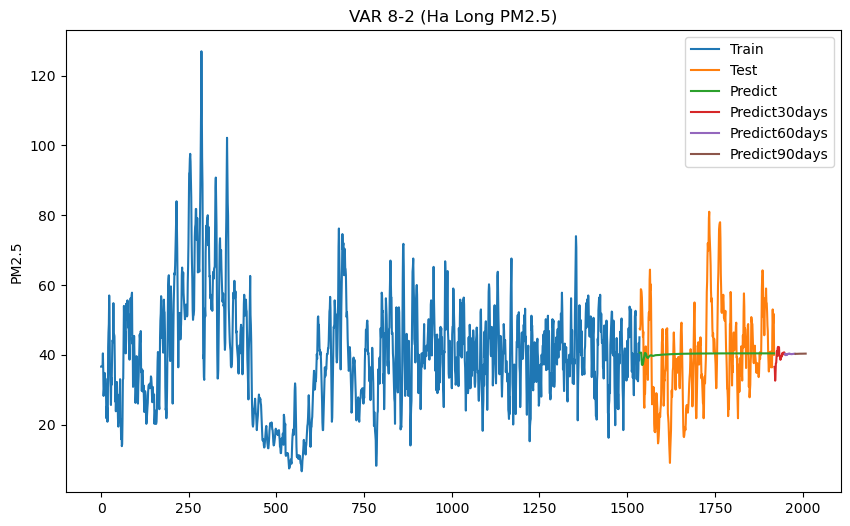

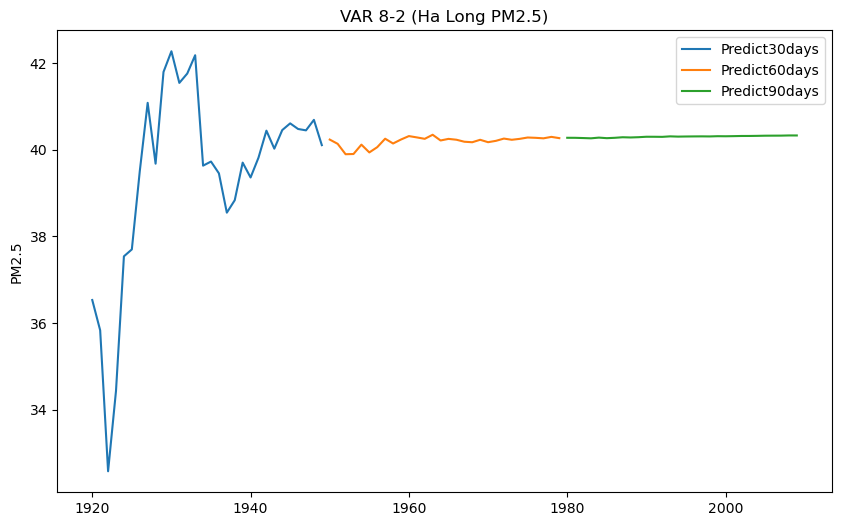

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử last_index và y_next_90_days đã được định nghĩa trước đó
# Bạn có thể thay thế chúng bằng dữ liệu thực tế của mình

# Vẽ biểu đồ huấn luyện và kiểm tra với dự đoán
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['pm25'], label='Train')
plt.plot(test_data.index, test_data['pm25'], label='Test')
plt.plot(test_data.index, y_pred[:, 0], label='Predict')

# Vẽ dự đoán 90 ngày
last_index = data.index[-1]  # Giả sử last_index là index cuối cùng của train_data

last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 8-2 (Ha Long PM2.5)')
plt.ylabel('PM2.5')
plt.show()

# Vẽ dự đoán 90 ngày với kích thước 14x7
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 8-2 (Ha Long PM2.5)')
plt.ylabel('PM2.5')
plt.show()
